### Objective 

The objective of this challenge is to develop a machine learning model that predicts which passengers survived the Titanic shipwreck. By analyzing passenger data, including factors such as name, age, gender, and socio-economic class, the model aims to answer the question: 'What sorts of people were more likely to survive?

### Goal
The task is to predict whether a passenger survived or not, using the Titanic dataset. For each passenger in the set, the model will output either a 0 (did not survive) or 1 (Survived).

### Evaluation Metric

The model's performance will be evaluated based on accuracy, which represents the percentage of passenger whose survival status is correctly predicted.

### Dataset Overview

The Titanic dataset contains demographic and survival information for passengers aboard the Titanic.

Key Features:

Survived: 0 = No, 1 = Yes (whether the passenger survived or not)
Pclass: Passenger Class (1st, 2nd, 3rd)
Sex: Gender
Age: Age of passengers
Fare: Amount paid for the ticket
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
SibSp and Parch: Number of siblings/spouses and parents/children aboard the Titanic

### Importing Necessary Libraries
Here, we import the libraries that will help us load, analyze, and visualize the data:
- **Pandas**: For data manipulation and analysis
- **Numpy**: For numerical operations
- **Seaborn** and **Matplotlib**: For data visualization
- **Scipy.stats**: For statistical calculations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Loading the Titanic Dataset
We load the dataset into a pandas DataFrame for further analysis.

### Data Snapshot
Below is a preview of the first five rows of the Titanic dataset. This gives us an overview of what the data looks like, including the feature names and some sample values.

In [2]:
### Data table snapshot
df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)
To understand the structure of the data, we look at the general information about the dataset. This includes the number of entries, the data types of each feature, and how many missing values we might need to handle.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Count missing values

missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
age_counts = df['Age'].value_counts().sort_index()
print(age_counts)


0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64


In [7]:
# Minimum age
min_age = df['Age'].min()
print("Minimum Age:", min_age)

# Maximum age
max_age = df['Age'].max()
print("Maximum Age:", max_age)



Minimum Age: 0.42
Maximum Age: 80.0


### Handling Missing Values
Missing data can cause problems during analysis and model training. Here’s how we handle missing values:
- **Age**: We fill missing values with the median age.
- **Embarked**: We fill missing values with the most common port of embarkation (mode).
- **Cabin**: This column has too many missing values, so we drop it from our analysis.


### Checking for Duplicates
To ensure data integrity, we check if the dataset contains any duplicate rows. Duplicates could introduce bias in our model, so we would remove them if any are found.


In [8]:
# Handle missing values in the Age column

df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing values in the Embarked column

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle missing values in the Cabin column

df.drop('Cabin', axis=1, inplace=True)

# Convert data type

df['Age'] = df['Age'].astype(int)

duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


### Boxplot for Fare
We create a boxplot to visualize the distribution of fares paid by passengers. The boxplot helps us identify any outliers or extreme values in the 'Fare' column.


In [9]:
# Count the frequency of each fare value
fare_counts = df['Fare'].value_counts()

# Display the result
print(fare_counts)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [10]:
fare_counts = df['Fare'].value_counts().sort_index()
print(fare_counts)

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64


In [11]:
### Let's check for null values

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
df['Ticket'] = df['Ticket'].str.strip()

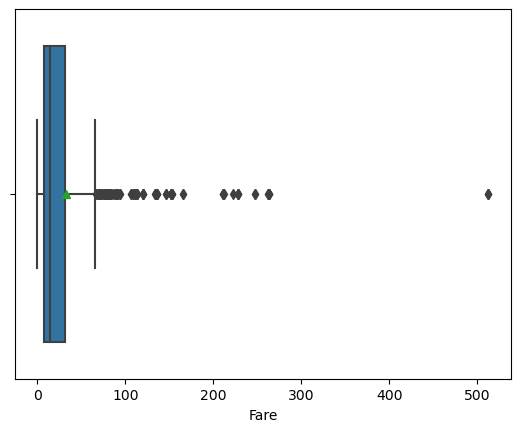

In [13]:
# Create a boxplot for Fare Columnn

sns.boxplot(
    x = df["Fare"],
    showmeans=True,
)

plt.show()

### Handling Outliers
Outliers can skew our analysis and model performance. Using the Interquartile Range (IQR) method, we cap extreme values in the 'Fare' column to limit their influence on our model.


In [14]:
# Calculate Interquartile Range
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Capping outliers
df['Fare'] = np.where(df['Fare'] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['Fare'])
#df['Fare'] = np.where(df['Fare'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['Fare'])

In [15]:

IQR = Q3-Q1
print(IQR)

23.0896


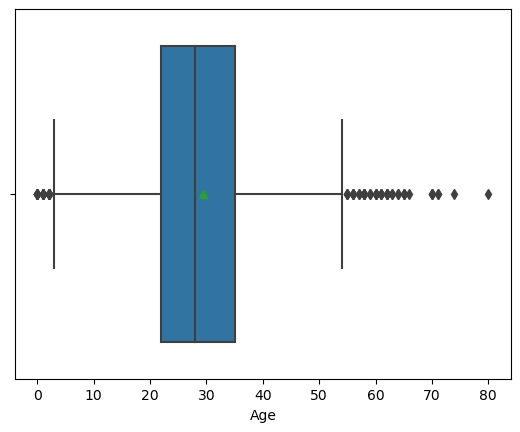

In [16]:
# Create a boxplot for Age Columnn

sns.boxplot(
    x = df["Age"],
    showmeans=True,
)

plt.show()

In [17]:

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where Age value is an outlier
outliers_df = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print(outliers_df)

     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex  Age  SibSp  Parch  \
7                   Palsson, Master. Gosta Leonard    male    2      3      1   
11                        Bonnell, Miss. Elizabeth  female   58      0      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female   55      0      0   
16                            Rice, Master. Eugene    male    2      4      1   
33                           Wheadon, Mr. Edward H    male   66      0      0   
..                                             ...     ..

In [18]:
# Analyze category distribution

print(df['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


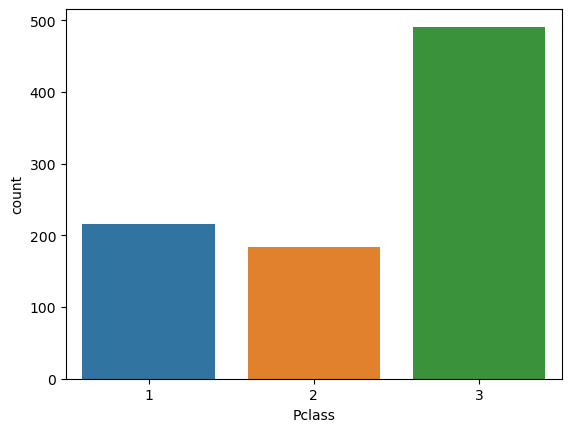

In [19]:
# Visualize category distribution

sns.countplot(x='Pclass', data=df)
plt.show()

In [20]:
# Analyze category distribution

print(df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


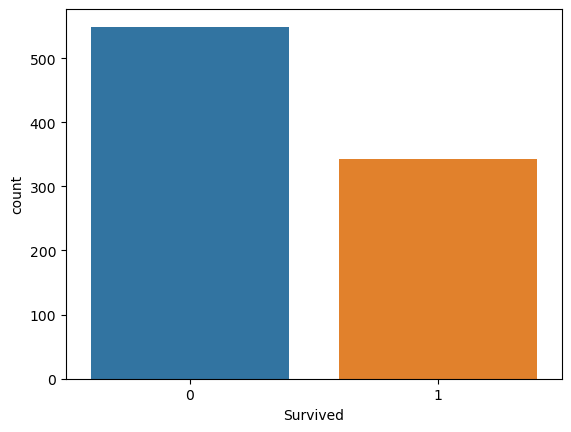

In [21]:
# Visualize category distribution

sns.countplot(x='Survived', data=df)
plt.show()

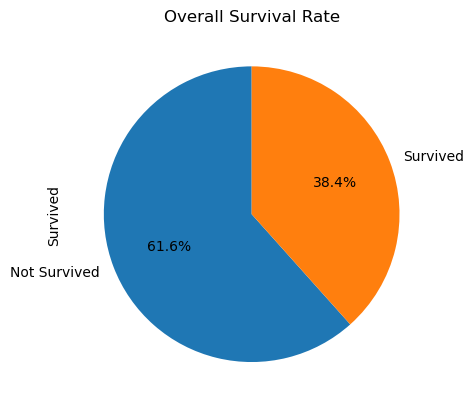

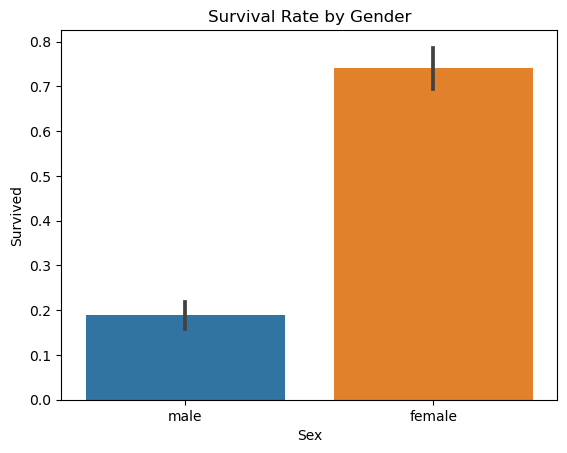

In [22]:
# Pie chart for survival rate
df['Survived'].value_counts().plot(kind='pie', labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Survival Rate')
plt.show()

# Bar plot for survival by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


In [23]:
df['PassengerId'] = df['PassengerId'].astype(object)
df['SibSp'] = df['SibSp'].astype(object)
df['Parch'] = df['Parch'].astype(object)

In [24]:
## Check for outliers iin the Age Column

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1

print(IQR)

13.0


In [25]:
#Return the data with outliers
df_outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]

print(df_outliers)

    PassengerId  Survived  Pclass  \
7             8         0       3   
11           12         1       1   
15           16         1       2   
16           17         0       3   
33           34         0       2   
..          ...       ...     ...   
827         828         1       2   
829         830         1       1   
831         832         1       2   
851         852         0       3   
879         880         1       1   

                                              Name     Sex  Age SibSp Parch  \
7                   Palsson, Master. Gosta Leonard    male    2     3     1   
11                        Bonnell, Miss. Elizabeth  female   58     0     0   
15                Hewlett, Mrs. (Mary D Kingcome)   female   55     0     0   
16                            Rice, Master. Eugene    male    2     4     1   
33                           Wheadon, Mr. Edward H    male   66     0     0   
..                                             ...     ...  ...   ...   ...   
82

### Descriptive Statistics
We display the summary statistics of the dataset, such as the count, mean, standard deviation, minimum, and maximum values for numerical features. This helps us identify the range and distribution of values for different variables.


In [26]:
# Calculate and print various statistics for the 'Age' column
print("Mean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Mode Age:", df['Age'].mode()[0])  # Mode can have multiple values, so we take the first one
print("Minimum Age:", df['Age'].min())
print("Maximum Age:", df['Age'].max())
print("Standard Deviation of Age:", df['Age'].std())
print("Count of Age values:", df['Age'].count())


Mean Age: 29.34567901234568
Median Age: 28.0
Mode Age: 28
Minimum Age: 0
Maximum Age: 80
Standard Deviation of Age: 13.028211862792078
Count of Age values: 891


In [27]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

survivors_count = df['Survived'].sum()
print("Number of Survivors:", survivors_count)

average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Class:\n", average_fare_by_class)

max_fare = df['Fare'].max()
print("Maximum Fare:", max_fare)


Average Age: 29.34567901234568
Number of Survivors: 342
Average Fare by Class:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Maximum Fare: 512.3292


### Dataset Preparation 

Let's clean the data


### Cleaning the Ticket Column
We clean the 'Ticket' column by stripping unnecessary spaces. This ensures that all values in the column are uniform and free from formatting issues.


In [28]:
df['Title and Name'] = df['Name'].str.split(',', expand=True)[1].str.split('(', expand=True)[0].str.strip()

# Display the updated DataFrame with the 'Title and Name' column
df[['Name', 'Title and Name']].head()

,Name,Title and Name
0,"Braund, Mr. Owen Harris",Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs. John Bradley
2,"Heikkinen, Miss. Laina",Miss. Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs. Jacques Heath
4,"Allen, Mr. William Henry",Mr. William Henry


In [29]:
# Standardize the 'Ticket' column by removing extra spaces and converting to uppercase
df['Ticket'] = df['Ticket'].str.strip().str.upper()

# Optionally, remove any non-alphanumeric characters (e.g., special symbols) from the 'Ticket' column
df['Ticket'] = df['Ticket'].str.replace(r'[^A-Z0-9]', '', regex=True)

# If there is a pattern where you need to split tickets by a prefix (e.g., letters and numbers), you can do:
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Z]+)', expand=False)  # Extract letter prefix
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)', expand=False)     # Extract number part

# Display the cleaned dataframe
df[['Ticket', 'Ticket_Prefix', 'Ticket_Number']].head()

,Ticket,Ticket_Prefix,Ticket_Number
0,A521171,A,521171
1,PC17599,PC,17599
2,STONO23101282,STONO,23101282
3,113803,NaN,113803
4,373450,NaN,373450


In [30]:
# Create a new column 'Cleaned_Ticket' by removing any non-numeric characters
df['Cleaned_Ticket'] = df['Ticket'].str.extract(r'(\d+)', expand=False)

# Display the updated dataframe to check the 'Cleaned_Ticket' column
df[['Ticket', 'Cleaned_Ticket']].head()


,Ticket,Cleaned_Ticket
0,A521171,521171
1,PC17599,17599
2,STONO23101282,23101282
3,113803,113803
4,373450,373450


In [31]:
# Create a new column 'Cleaned_Ticket' by extracting only the numeric part of the 'Ticket' column
df['Cleaned_Ticket'] = df['Ticket'].str.extract(r'(\d+)', expand=False)

# Drop the 'Ticket', 'Ticket_Prefix', and 'Ticket_Number' columns (if Ticket_Prefix and Ticket_Number were already created)
df.drop(columns=['Ticket', 'Ticket_Prefix', 'Ticket_Number'], inplace=True, errors='ignore')

# Display the updated dataframe with only the 'Cleaned_Ticket' column
df[['Cleaned_Ticket']].head()

,Cleaned_Ticket
0,521171
1,17599
2,23101282
3,113803
4,373450


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title and Name,Cleaned_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr. Owen Harris,521171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs. John Bradley,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss. Laina,23101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs. Jacques Heath,113803
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr. William Henry,373450


In [33]:
# Drop the 'Name' column 
df.drop(columns=['Name'], inplace=True, errors='ignore')
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title and Name,Cleaned_Ticket
0,1,0,3,male,22,1,0,7.2500,S,Mr. Owen Harris,521171
1,2,1,1,female,38,1,0,71.2833,C,Mrs. John Bradley,17599
2,3,1,3,female,26,0,0,7.9250,S,Miss. Laina,23101282
3,4,1,1,female,35,1,0,53.1000,S,Mrs. Jacques Heath,113803
4,5,0,3,male,35,0,0,8.0500,S,Mr. William Henry,373450


### Data Viz

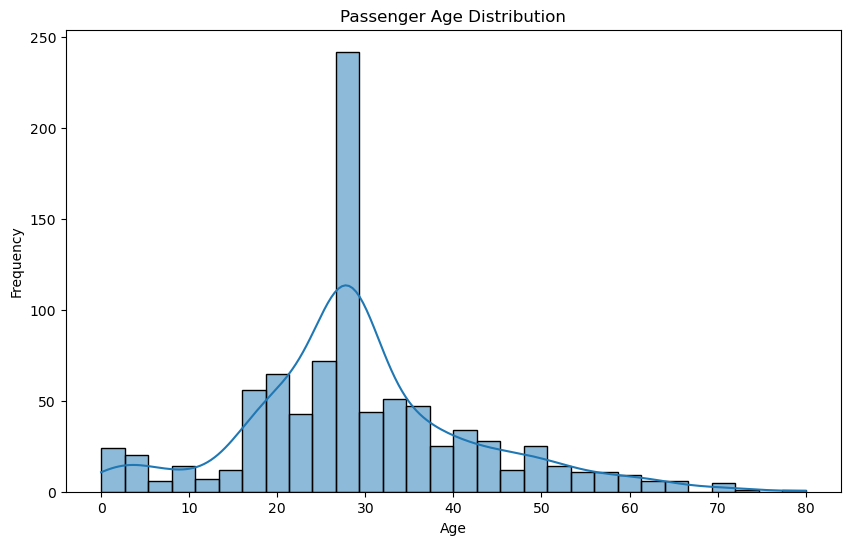

In [34]:
# Histogram and KDE for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

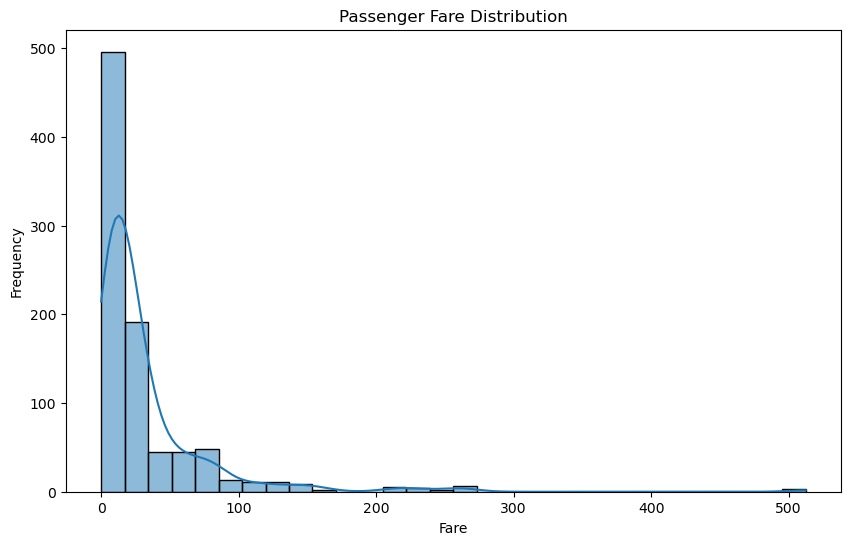

In [35]:
# Histogram and KDE for Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Passenger Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


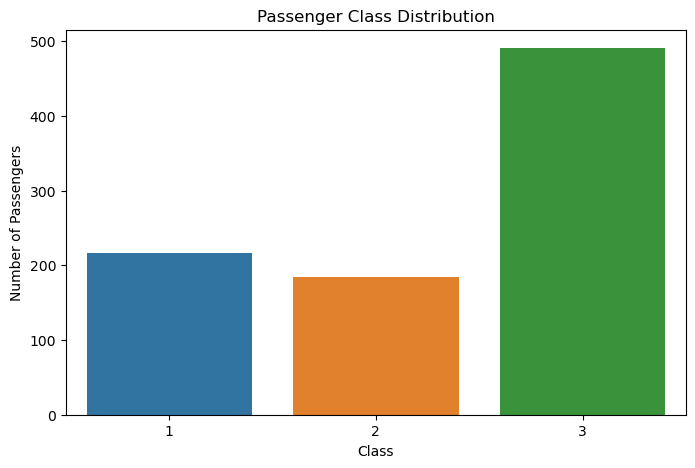

In [36]:
# Count plot for Passenger Class (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

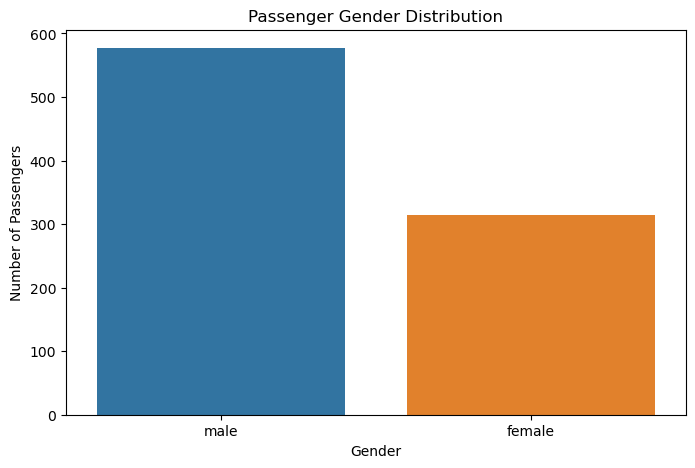

In [37]:
# Count plot for Gender (Sex)
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

### Survival Rate by Gender
We analyze the relationship between gender and survival. Historically, women and children were prioritized for rescue, so we expect a higher survival rate among females.


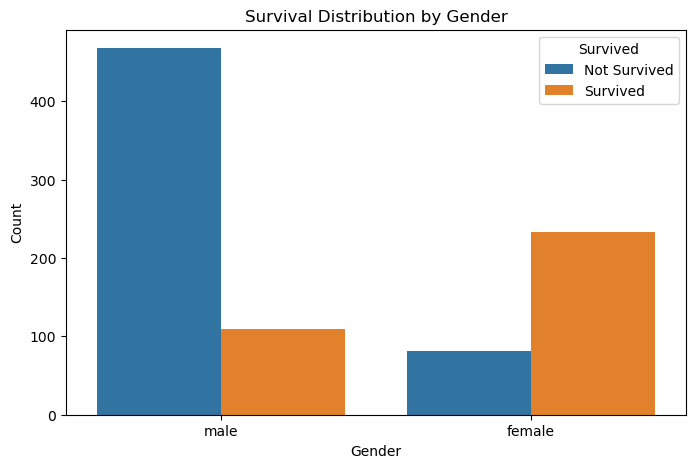

In [38]:
# Bar plot for Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

### Survival Rate by Passenger Class
We analyze how passenger class (1st, 2nd, or 3rd) influenced survival rates. Higher class passengers may have had better access to lifeboats.


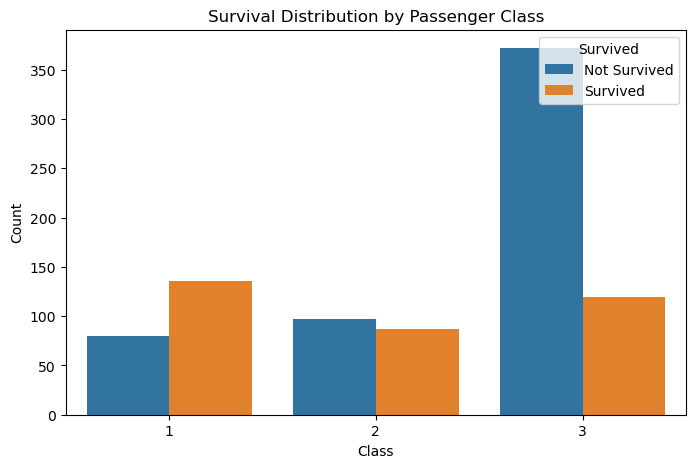

In [39]:
# Bar plot for Survival by Passenger Class (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_15048\3707414835.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


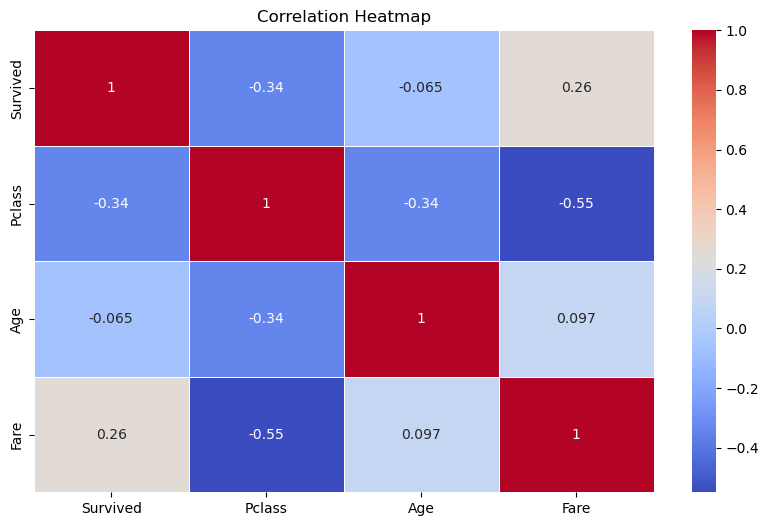

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



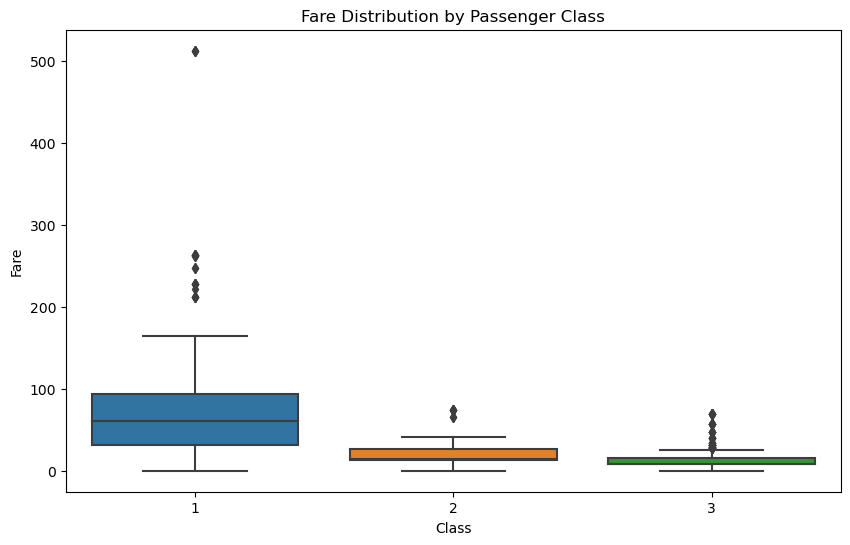

In [41]:
# Box plot for Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

### Age Distribution
We plot the distribution of passenger ages to understand the age range and see if certain age groups had higher survival rates.


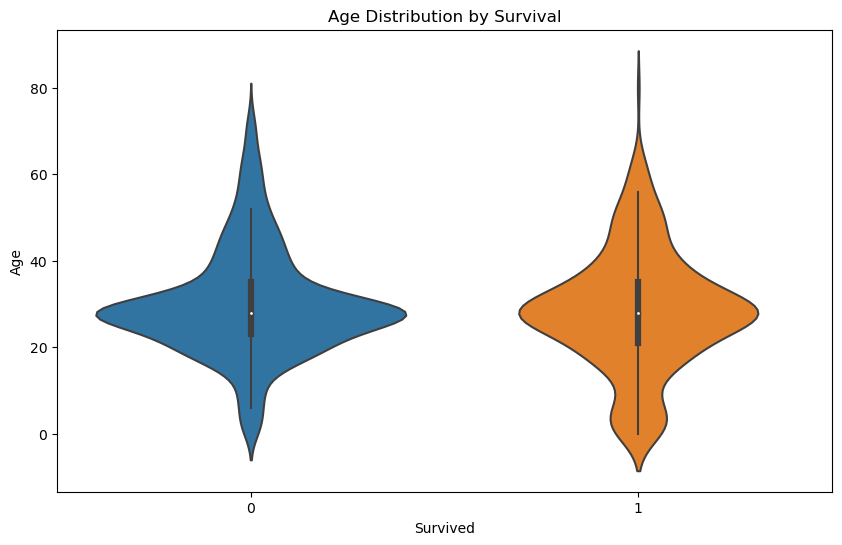

In [42]:
# Violin plot for Age by Survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [43]:
# Pairplot
pairplot = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']

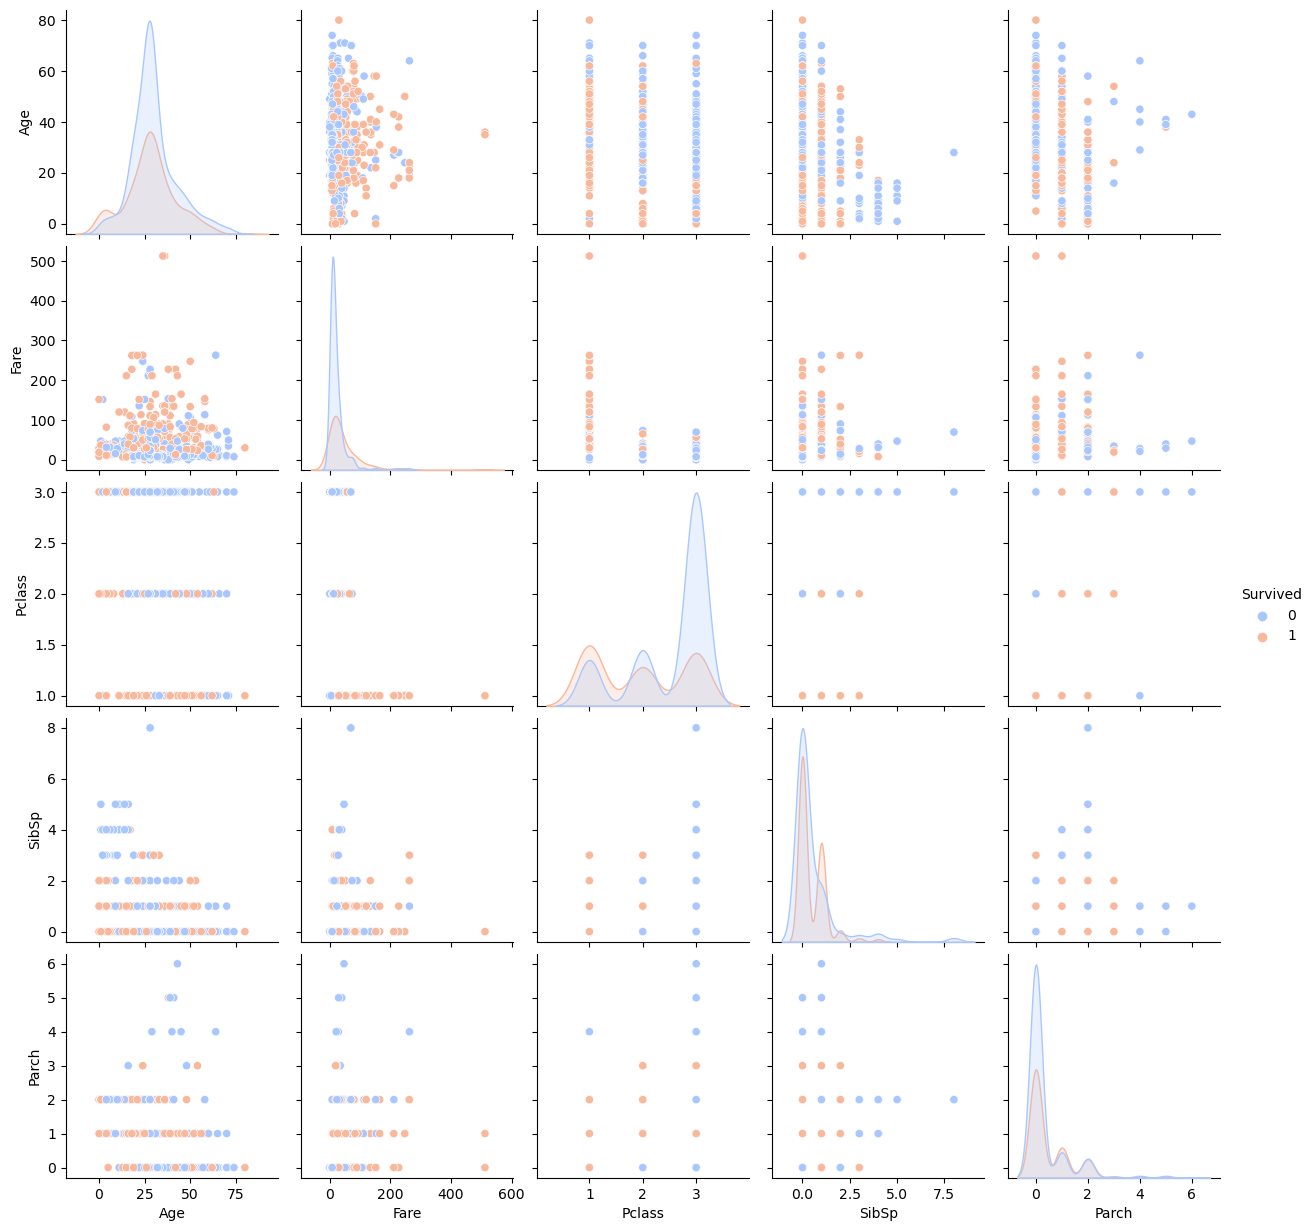

In [44]:
# Create the pair plot
sns.pairplot(df[pairplot], hue='Survived', palette='coolwarm')

In [45]:
#Display the plot
plt.show()

In [46]:
#Compute the correlation matrix

corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_15048\3111109686.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr()


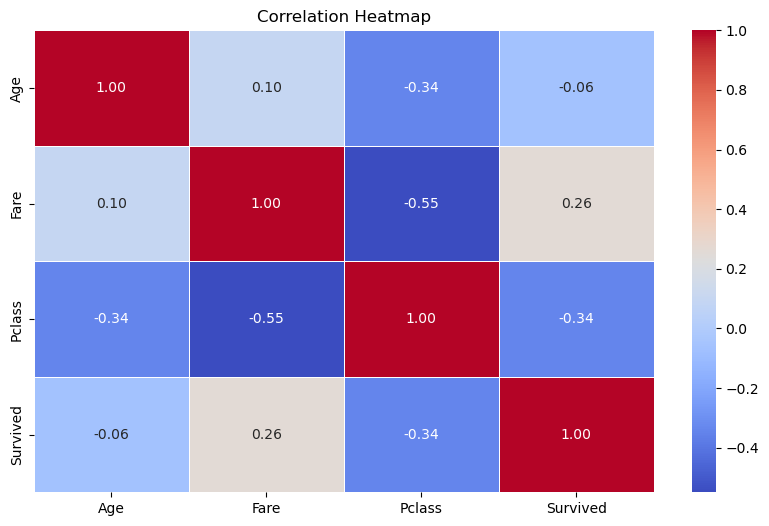

In [47]:
# Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', linewidths=0.5, fmt='.2f')


#Display the plot

plt.title('Correlation Heatmap')
plt.show()

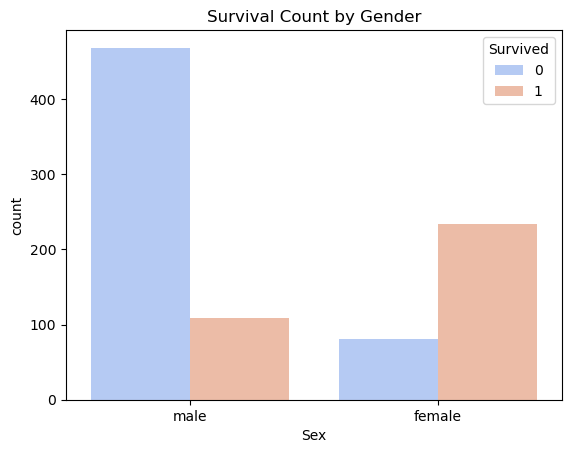

In [48]:
# Count plot example: Survival


sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')

#Display the plot
plt.title('Survival Count by Gender')

plt.show()

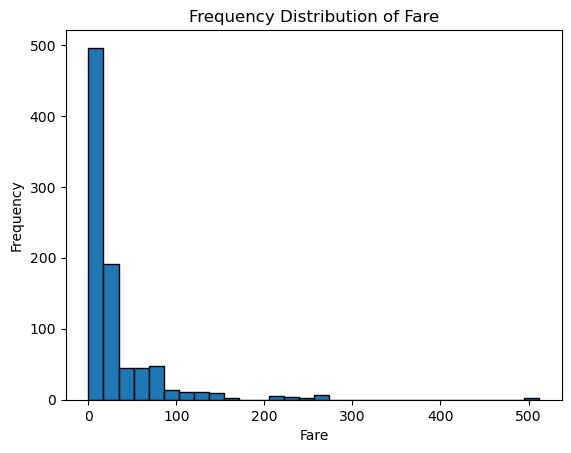

In [49]:
# Plotting the histogram for the Fare column
plt.hist(df['Fare'], bins=30, edgecolor='black')
plt.title('Frequency Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


### Feature Engineering
To improve model accuracy, we create new features or transform existing ones. For example, we create a 'FamilySize' feature by adding the number of siblings/spouses (SibSp) and parents/children (Parch) aboard. This may influence survival chances.


In [50]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves

# You can further categorize family size for better analysis:
df['FamilySizeCategory'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, 7, 11], 
                                   labels=['Alone', 'Small', 'Medium', 'Large'])

In [51]:
# Convert FamilySizeCategory to integers based on category mappings
family_size_mapping = {'Alone': 0, 'Small': 1, 'Medium': 2, 'Large': 3}
df['FamilySizeCategoryInt'] = df['FamilySizeCategory'].map(family_size_mapping)

# Drop the FamilySizeCategory column
df.drop('FamilySizeCategory', axis=1, inplace=True)

# Rename FamilySizeCategoryInt to Family_Size
df.rename(columns={'FamilySizeCategoryInt': 'Family_Size'}, inplace=True)

# Display the updated DataFrame
df[['FamilySize', 'Family_Size']].head()



,FamilySize,Family_Size
0,2,1
1,2,1
2,1,0
3,2,1
4,1,0


In [52]:
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'])

In [53]:
df['IsChild'] = (df['Age'] < 12).astype(int)

In [54]:
#df['AgeGroup_Sex'] = df['AgeGroup'].astype(str) + '_' + df['Sex'].astype(str)

In [55]:
#age_group_survival_rates = df.groupby('AgeGroup')['Survived'].mean().to_dict()
   #df['AgeGroupSurvivalRate'] = df['AgeGroup'].map(age_group_survival_rates)

### Descriptive Statistics

Descriptive statistics for key numerical columns such as age, fare, and ticket class

In [56]:
mean_age = df['Age'].mean()
mean_fare = df['Fare'].mean()

print(f"Mean Age: {mean_age}")
print(f"Mean Fare: {mean_fare}")

Mean Age: 29.34567901234568
Mean Fare: 32.204207968574636


In [57]:
median_age = df['Age'].median()
median_fare = df['Fare'].median()

print(f"Median Age: {median_age}")
print(f"Median Fare: {median_fare}")

Median Age: 28.0
Median Fare: 14.4542


In [58]:
mode_age = df['Age'].mode()[0]  # Mode can return multiple values, so [0] takes the first
mode_fare = df['Fare'].mode()[0]

print(f"Mode Age: {mode_age}")
print(f"Mode Fare: {mode_fare}")

Mode Age: 28
Mode Fare: 8.05


In [59]:
variance_age = df['Age'].var()
variance_fare = df['Fare'].var()

print(f"Variance Age: {variance_age}")
print(f"Variance Fare: {variance_fare}")

Variance Age: 169.73430434179625
Variance Fare: 2469.436845743117


In [60]:
std_age = df['Age'].std()
std_fare = df['Fare'].std()

print(f"Standard Deviation Age: {std_age}")
print(f"Standard Deviation Fare: {std_fare}")

Standard Deviation Age: 13.028211862792078
Standard Deviation Fare: 49.693428597180905


In [61]:
# Select key numerical columns
numerical_columns = ['Age', 'Fare', 'Pclass']

# Calculate descriptive statistics
descriptive_stats = df[numerical_columns].describe()

print(descriptive_stats)

              Age        Fare      Pclass
count  891.000000  891.000000  891.000000
mean    29.345679   32.204208    2.308642
std     13.028212   49.693429    0.836071
min      0.000000    0.000000    1.000000
25%     22.000000    7.910400    2.000000
50%     28.000000   14.454200    3.000000
75%     35.000000   31.000000    3.000000
max     80.000000  512.329200    3.000000


In [62]:
# Calculate mean, median, and mode for Age
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

# Calculate mean, median, and mode for Fare
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode()[0]

print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")
print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")

Age - Mean: 29.34567901234568, Median: 28.0, Mode: 28
Fare - Mean: 32.204207968574636, Median: 14.4542, Mode: 8.05


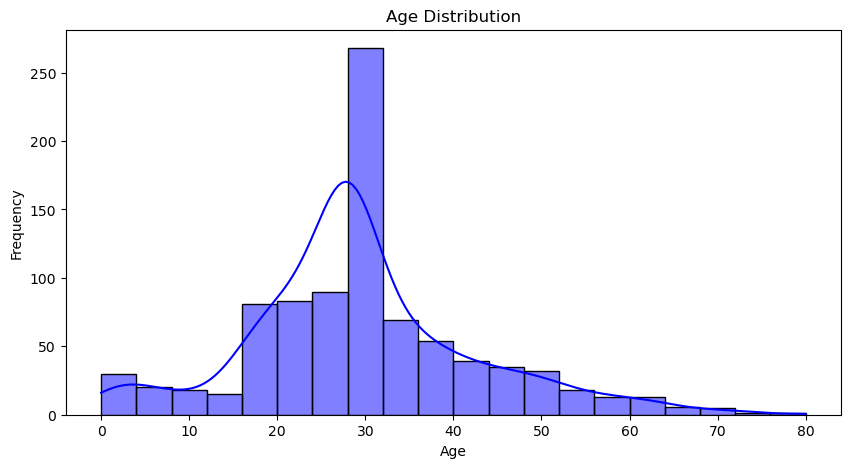

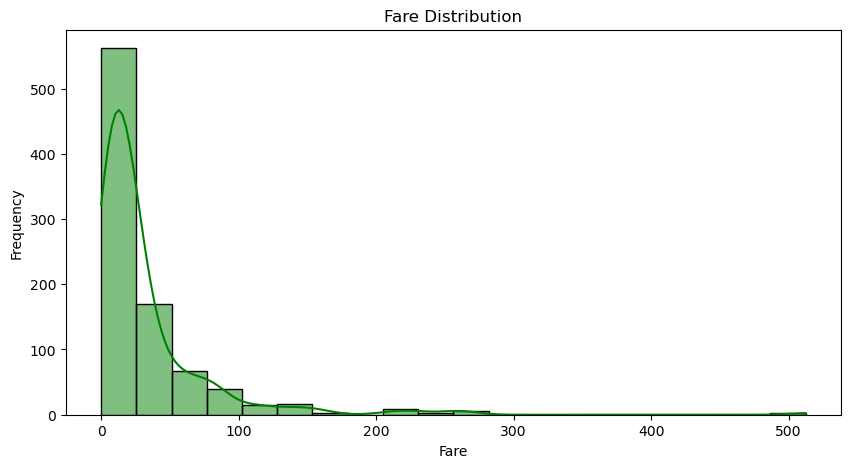

In [63]:
# Age histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

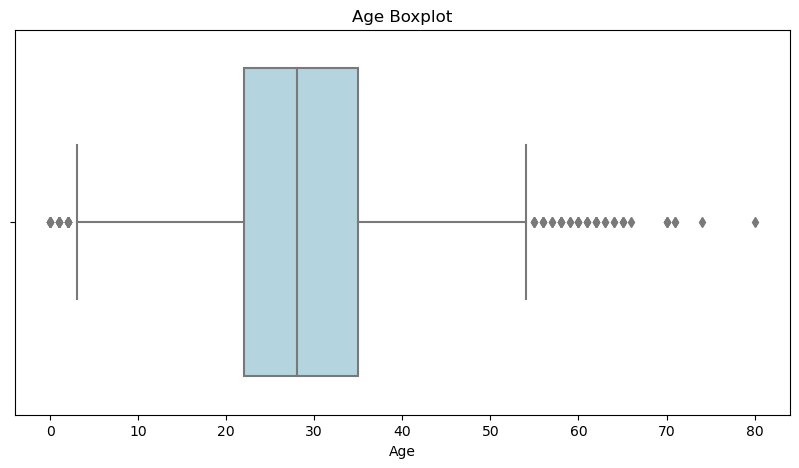

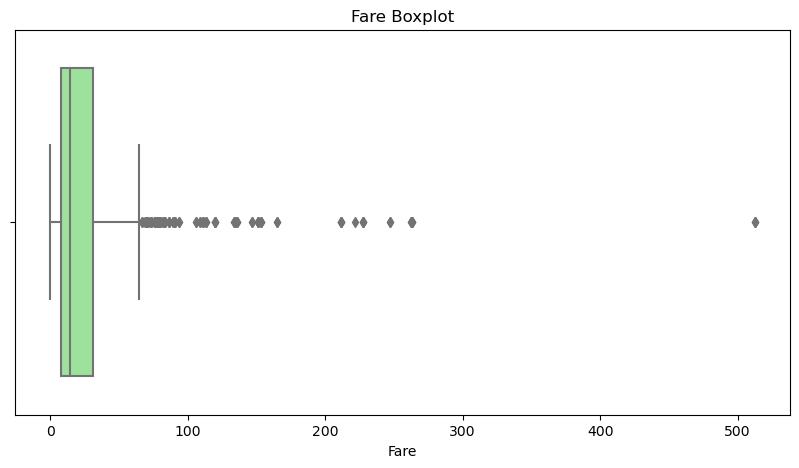

In [64]:
# Age boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Age Boxplot')
plt.show()

# Fare boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'], color='lightgreen')
plt.title('Fare Boxplot')
plt.show()

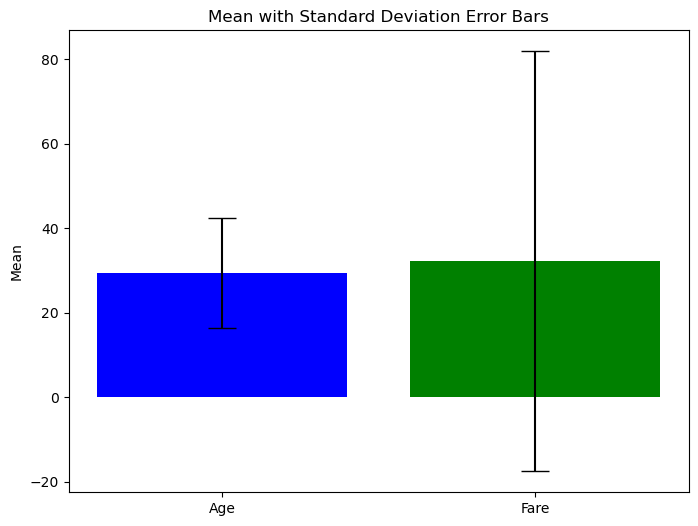

In [65]:
# Bar plot with standard deviation as error bars
statistics = pd.DataFrame({
    'Feature': ['Age', 'Fare'],
    'Mean': [mean_age, mean_fare],
    'Std Dev': [std_age, std_fare]
})

plt.figure(figsize=(8, 6))
plt.bar(statistics['Feature'], statistics['Mean'], yerr=statistics['Std Dev'], capsize=10, color=['blue', 'green'])
plt.title('Mean with Standard Deviation Error Bars')
plt.ylabel('Mean')
plt.show()

In [66]:
# Summary of descriptive statistics
df[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.345679,32.204208
std,13.028212,49.693429
min,0.000000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


### Correlation Analysis

Relationship between different numerical variables

C:\Users\PC\AppData\Local\Temp\ipykernel_15048\6922378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


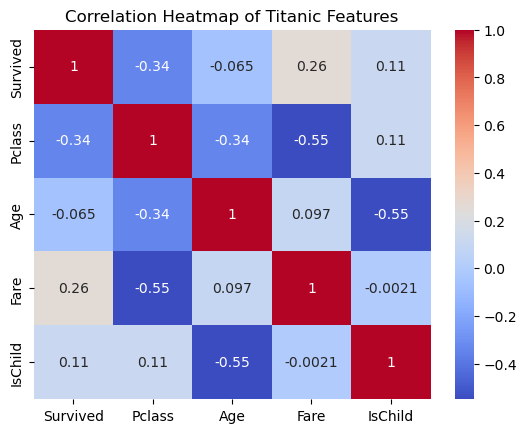

In [67]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Titanic Features')
plt.show()


In [68]:
# Calculate the survival rates by gender

survival_rate_male = df[df['Sex'] == 'male']['Survived'].mean()
survival_rate_female = df[df['Sex'] == 'female']['Survived'].mean()
print(f"Survival rate for male: {survival_rate_male}")
print(f"Survival rate for female: {survival_rate_female}")

Survival rate for male: 0.18890814558058924
Survival rate for female: 0.7420382165605095


In [69]:
# Sig Value of 5% or 0.05
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

t_stat, p_value = stats.ttest_ind(male_survival, female_survival)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -19.297816550123354, P-value: 1.4060661308802594e-69


In [70]:
# Separate the data into survivors and non-survivors
survivors = df[df['Survived'] == 1]['Age'].dropna()  # Drop missing values
non_survivors = df[df['Survived'] == 0]['Age'].dropna()

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(survivors, non_survivors)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.9394214568382195
P-value: 0.05276610621105064


In [71]:
## Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

          Survived    Pclass       Age      Fare   IsChild
Survived  1.000000 -0.338481 -0.064909  0.257307  0.112119
Pclass   -0.338481  1.000000 -0.339999 -0.549500  0.111356
Age      -0.064909 -0.339999  1.000000  0.096838 -0.546537
Fare      0.257307 -0.549500  0.096838  1.000000 -0.002138
IsChild   0.112119  0.111356 -0.546537 -0.002138  1.000000


C:\Users\PC\AppData\Local\Temp\ipykernel_15048\3925435817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [72]:
# Calculate covariance matrix
covariance_matrix = df.cov()
print(covariance_matrix)

          Survived     Pclass         Age         Fare   IsChild
Survived  0.236772  -0.137703   -0.411486     6.221787  0.014493
Pclass   -0.137703   0.699015   -3.703440   -22.830196  0.024733
Age      -0.411486  -3.703440  169.734304    62.694293 -1.891580
Fare      6.221787 -22.830196   62.694293  2469.436846 -0.028224
IsChild   0.014493   0.024733   -1.891580    -0.028224  0.070573


C:\Users\PC\AppData\Local\Temp\ipykernel_15048\3485834359.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


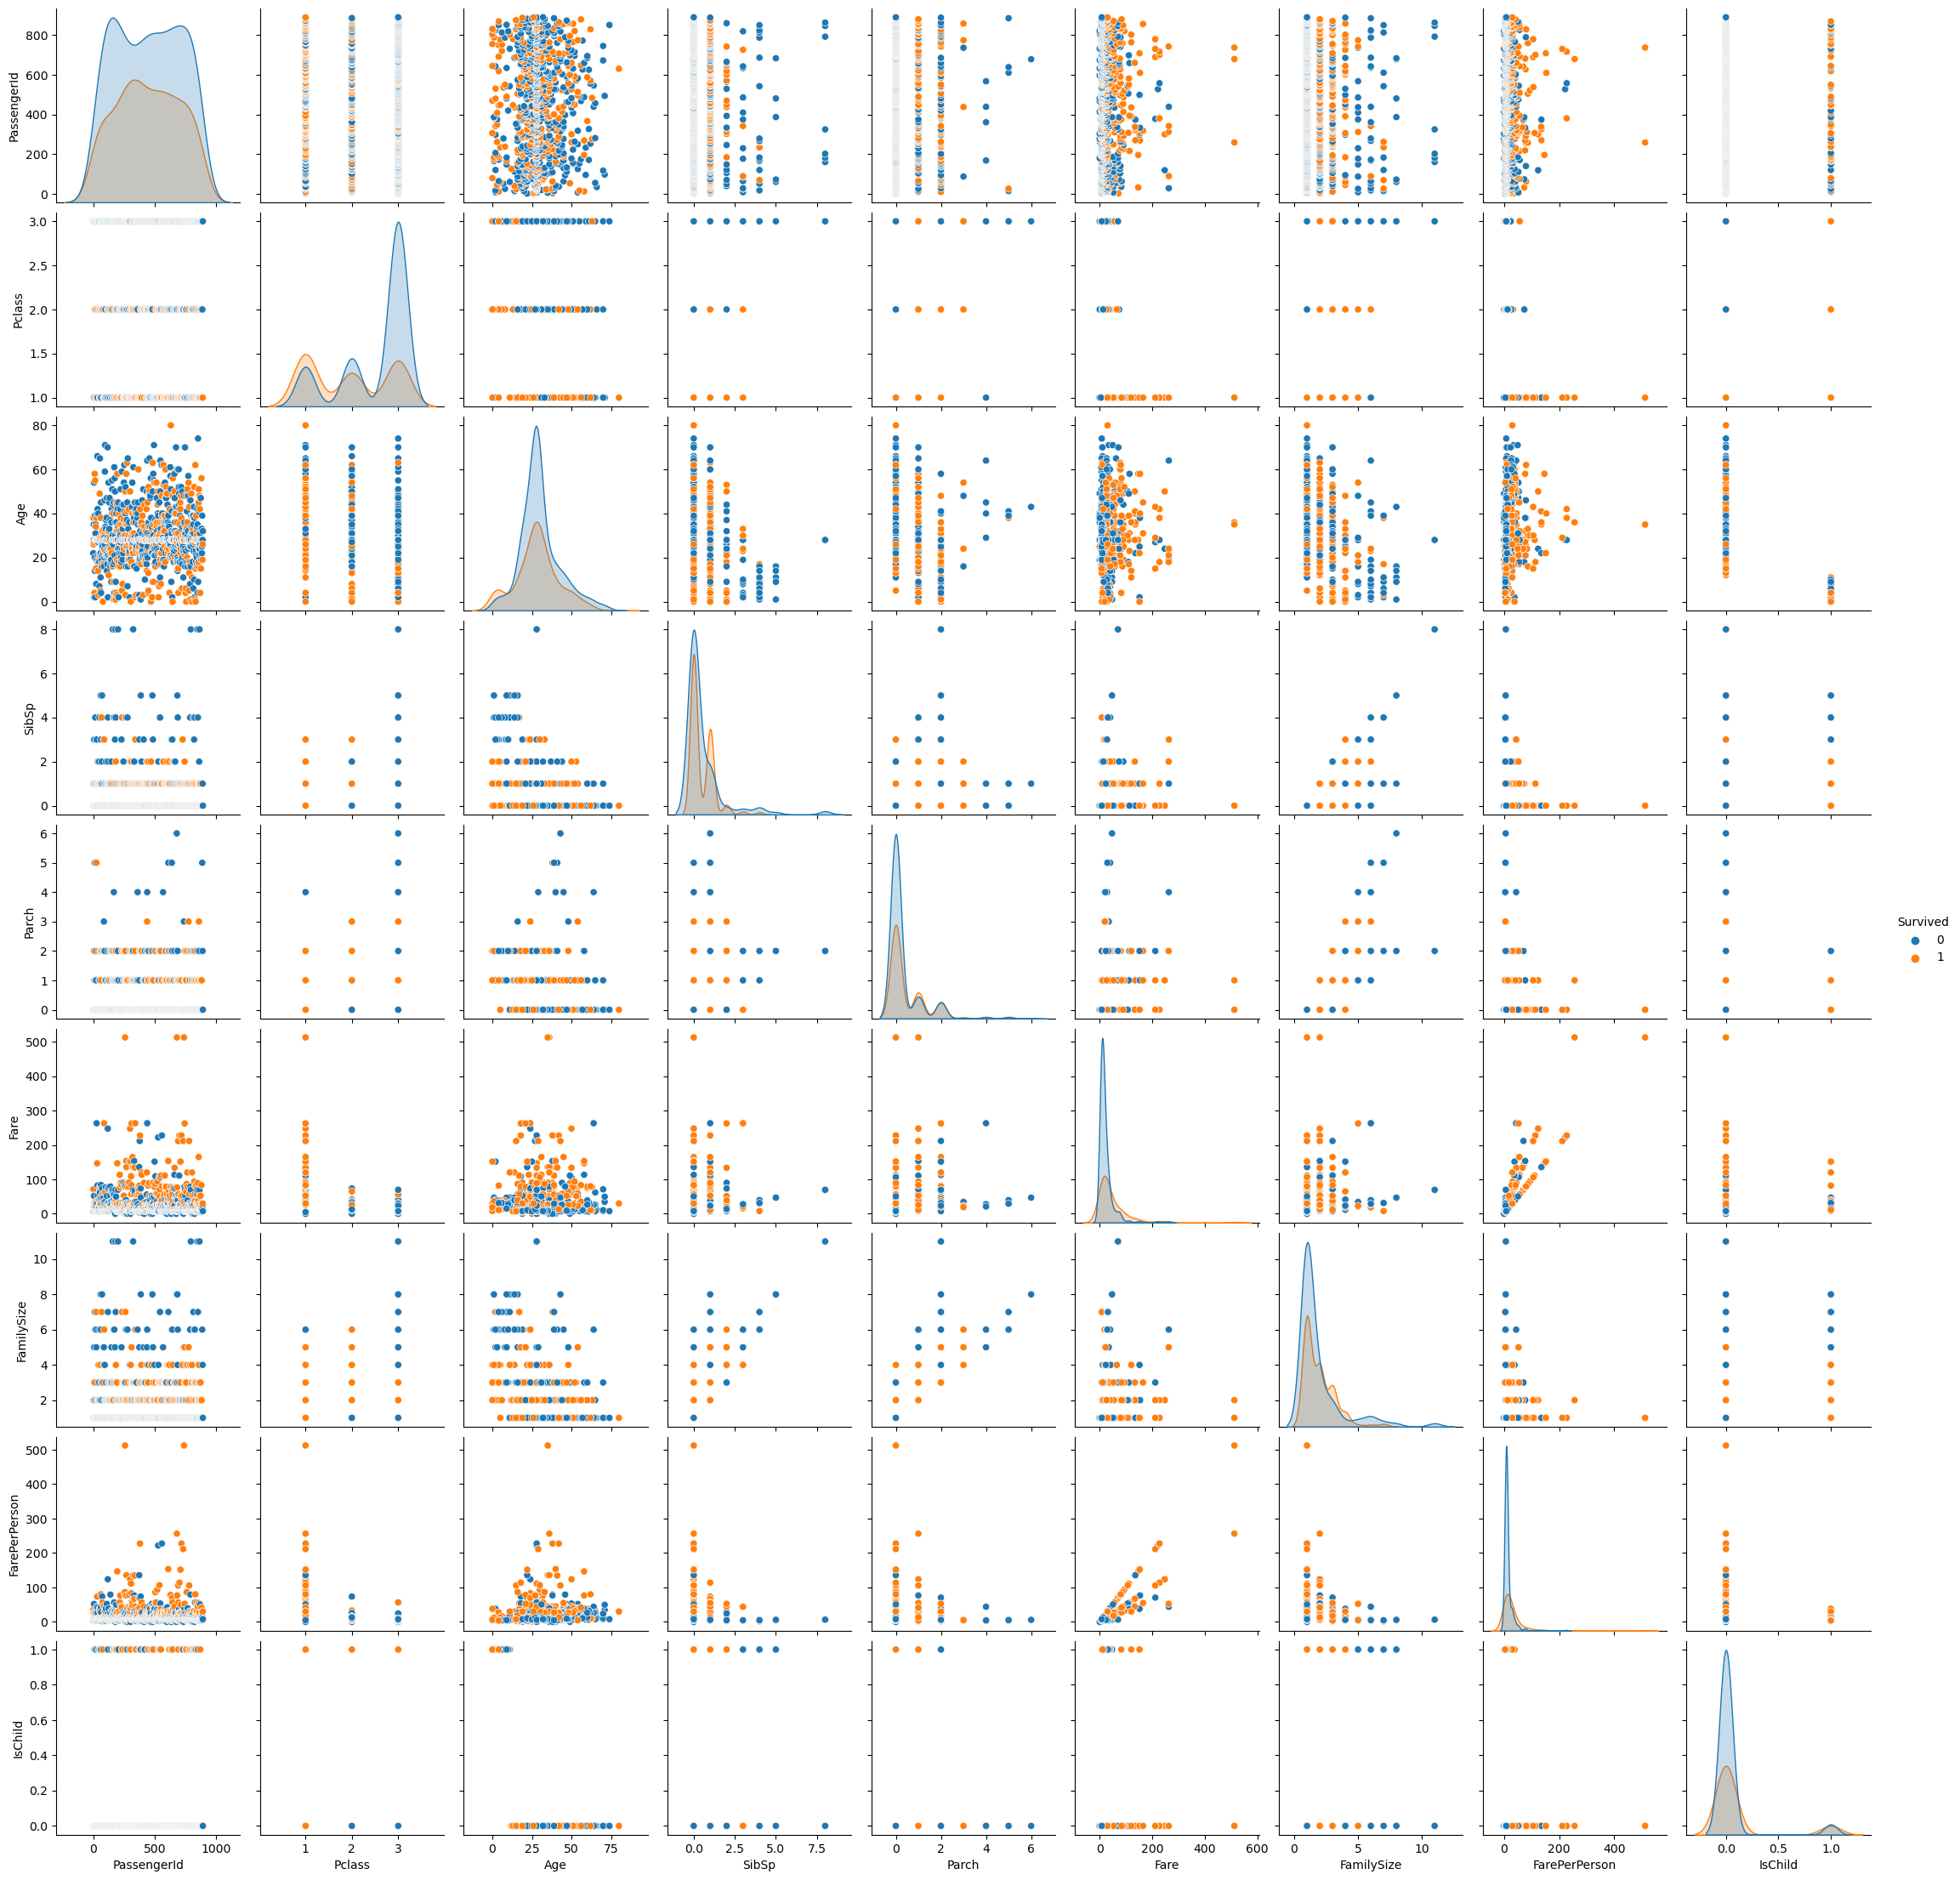

In [73]:
# Pairplot for visualizing pairwise relationships
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()

### Data Aggregation

In [74]:
# Group by 'Sex' and calculate the mean survival rate
gender_survival_rate = df.groupby('Sex')['Survived'].mean()

# Display the result
print("Survival rate by gender:")
print(gender_survival_rate)

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [75]:
# Group by 'Pclass' and calculate the mean survival rate
class_survival_rate = df.groupby('Pclass')['Survived'].mean()

# Display the result
print("Survival rate by passenger class:")
print(class_survival_rate)


Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [76]:
# Group by 'Sex' and 'Pclass' and calculate the mean survival rate
gender_class_survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Display the result
print("Survival rate by gender and class:")
print(gender_class_survival_rate)


Survival rate by gender and class:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [77]:
# Create age bins
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Middle-aged', 'Senior']

# Add a new 'Age Group' column to the dataframe based on age bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by 'Age Group' and calculate the mean survival rate
age_group_survival_rate = df.groupby('Age Group')['Survived'].mean()

# Display the result
print("Survival rate by age group:")
print(age_group_survival_rate)

Survival rate by age group:
Age Group
Child          0.532258
Teen           0.428571
Young Adult    0.329621
Middle-aged    0.426778
Senior         0.343750
Name: Survived, dtype: float64


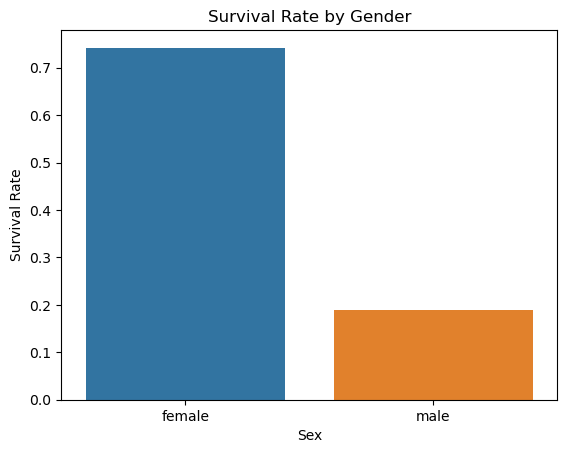

In [78]:
# Plot survival rate by gender
sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

In [79]:
# Calculate the total number of survivors by gender
survived_gender = df[df['Survived'] == 1]['Sex'].value_counts()

# Calculate the total number of passengers by gender
total_gender = df['Sex'].value_counts()

# Calculate the percentage of survivors by gender
percentage_survived_gender = (survived_gender / total_gender) * 100

print(percentage_survived_gender)


female    74.203822
male      18.890815
Name: Sex, dtype: float64


In [80]:
# Calculate the total number of passengers by gender
total_by_gender = df['Sex'].value_counts()

# Calculate the number of passengers who did not survive by gender
not_survived_by_gender = df[df['Survived'] == 0]['Sex'].value_counts()

# Calculate the percentage of passengers who did not survive by gender
percentage_not_survived_by_gender = (not_survived_by_gender / total_by_gender) * 100

print(percentage_not_survived_by_gender)


male      81.109185
female    25.796178
Name: Sex, dtype: float64


In [81]:
# Calculate the percentage of survivors and non-survivors by gender
survival_counts = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

# Rename columns for clarity
survival_counts.columns = ['Not Survived (%)', 'Survived (%)']

print(survival_counts)


        Not Survived (%)  Survived (%)
Sex                                   
female         25.796178     74.203822
male           81.109185     18.890815


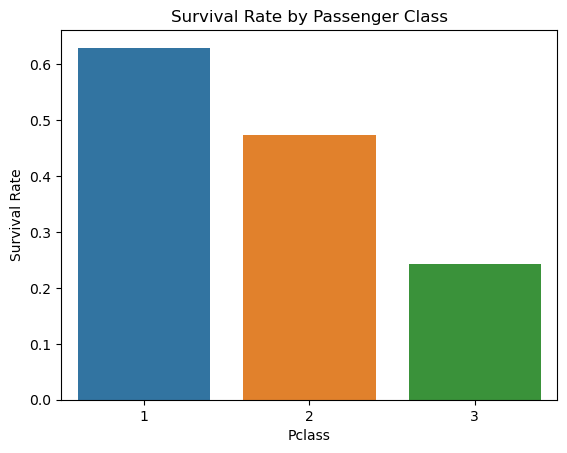

In [82]:
# Plot survival rate by class
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [83]:
# Calculate the percentage distribution for the Pclass column
pclass_distribution = df['Pclass'].value_counts(normalize=True) * 100

# Display the result
print(pclass_distribution)


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


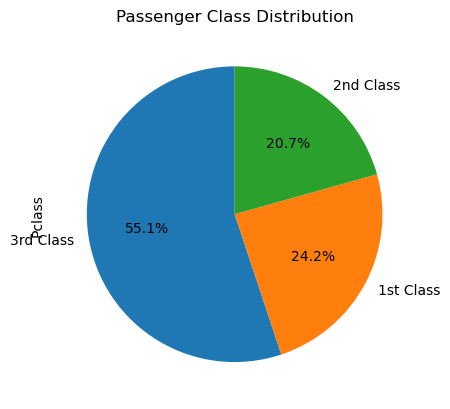

In [84]:
# Pie chart for Pclass distribution
df['Pclass'].value_counts().plot(kind='pie', labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.show()


In [85]:
# Group by Pclass and Sex, then count the occurrences
gender_distribution = df.groupby(['Pclass', 'Sex']).size().unstack()

# Display the result
print(gender_distribution)


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


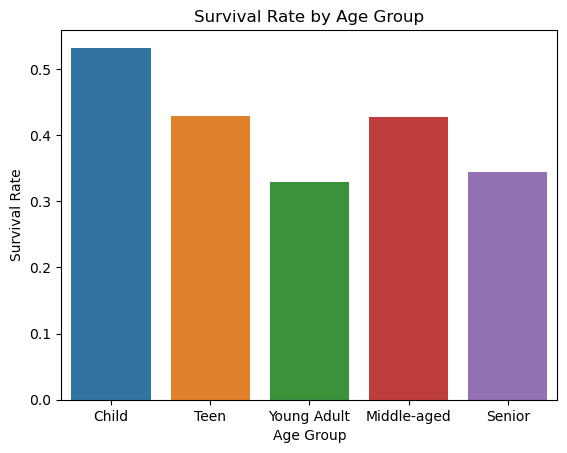

In [86]:
# Plot survival rate by age group
sns.barplot(x=age_group_survival_rate.index, y=age_group_survival_rate.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [87]:
#df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Plotting
#sns.catplot(x='AgeGroup', hue='Survived', col='Sex', row='Pclass', data=df, kind='count')
#plt.show()


### Hypothesis Testing

By applying statistical tests to determine if certain factors (e.g., gender, class) significantly impacted survival rates.

In [88]:
# Create a contingency table for Gender and Survived
contingency_table = pd.crosstab(df['Sex'], df['Survived'])

# Perform a chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies: 
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [89]:
print(contingency_table)

Survived    0    1
Sex               
female     81  233
male      468  109


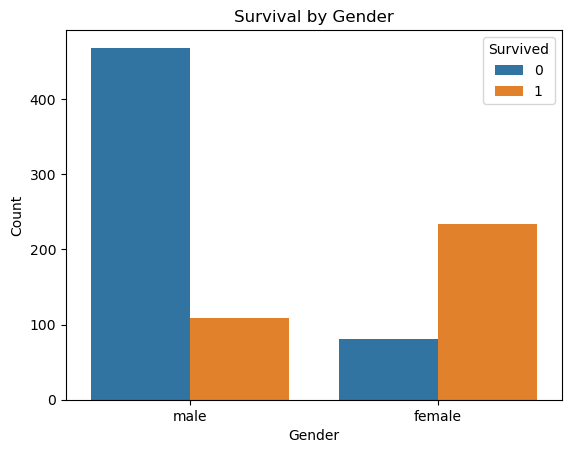

In [90]:
# Bar plot of survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Splitting Data into Training and Test Sets
To train the model, we split the dataset into training and test sets. The training set is used to train the model, and the test set is used to evaluate its performance on unseen data.


### Classification Models

Build and evaluate machine learning models for predicting survival.

In [91]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Fare' and 'Age'
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

# Display the first few rows to verify the scaling
df[['Fare', 'Age']].head()


,Fare,Age
0,-0.502445,-0.564145
1,0.786845,0.664649
2,-0.488854,-0.256947
3,0.420730,0.434250
4,-0.486337,0.434250


In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode 'Sex'
df['Sex'] = le.fit_transform(df['Sex'])

# Display the first few rows to verify the encoding
df[['Sex']].head()

,Sex
0,1
1,0
2,0
3,0
4,1


In [93]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [94]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title and Name,Cleaned_Ticket,FamilySize,Family_Size,FarePerPerson,IsChild,Age Group,Sex_1,Embarked_Q,Embarked_S
0,1,0,3,-0.564145,1,0,-0.502445,Mr. Owen Harris,521171,2,1,3.625,0,Young Adult,1,0,1
1,2,1,1,0.664649,1,0,0.786845,Mrs. John Bradley,17599,2,1,35.64165,0,Middle-aged,0,0,0
2,3,1,3,-0.256947,0,0,-0.488854,Miss. Laina,23101282,1,0,7.925,0,Young Adult,0,0,1
3,4,1,1,0.434250,1,0,0.420730,Mrs. Jacques Heath,113803,2,1,26.55,0,Middle-aged,0,0,1
4,5,0,3,0.434250,0,0,-0.486337,Mr. William Henry,373450,1,0,8.05,0,Middle-aged,1,0,1


In [95]:
# Drop columns that are not useful for modeling
df = df.drop(['PassengerId', 'Title and Name', 'Cleaned_Ticket'], axis=1)

In [96]:
df = pd.DataFrame(df)
print(df)

     Survived  Pclass       Age SibSp Parch      Fare FamilySize Family_Size  \
0           0       3 -0.564145     1     0 -0.502445          2           1   
1           1       1  0.664649     1     0  0.786845          2           1   
2           1       3 -0.256947     0     0 -0.488854          1           0   
3           1       1  0.434250     1     0  0.420730          2           1   
4           0       3  0.434250     0     0 -0.486337          1           0   
..        ...     ...       ...   ...   ...       ...        ...         ...   
886         0       2 -0.180147     0     0 -0.386671          1           0   
887         1       1 -0.794544     0     0 -0.044381          1           0   
888         0       3 -0.103348     1     2 -0.176263          4           1   
889         1       1 -0.256947     0     0 -0.044381          1           0   
890         0       3  0.203851     0     0 -0.492378          1           0   

    FarePerPerson  IsChild    Age Group

In [97]:
# Encode categorical variables
le = LabelEncoder()
df['Age Group'] = le.fit_transform(df['Age Group'])


In [98]:
# Define features and target
features = df.drop('Survived', axis=1)
target = df['Survived']

print("Features:\n", features.head())
print("Target:\n", target.head())

Features:
    Pclass       Age SibSp Parch      Fare FamilySize Family_Size  \
0       3 -0.564145     1     0 -0.502445          2           1   
1       1  0.664649     1     0  0.786845          2           1   
2       3 -0.256947     0     0 -0.488854          1           0   
3       1  0.434250     1     0  0.420730          2           1   
4       3  0.434250     0     0 -0.486337          1           0   

  FarePerPerson  IsChild  Age Group  Sex_1  Embarked_Q  Embarked_S  
0         3.625        0          4      1           0           1  
1      35.64165        0          1      0           0           0  
2         7.925        0          4      0           0           1  
3         26.55        0          1      0           0           1  
4          8.05        0          1      1           0           1  
Target:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [99]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:\n", X_train.head())
print("Training Target:\n", y_train.head())
print("Testing Features:\n", X_test.head())
print("Testing Target:\n", y_test.head())


Training Features:
      Pclass       Age SibSp Parch      Fare FamilySize Family_Size  \
331       1  1.202246     0     0 -0.074583          1           0   
733       2 -0.487346     0     0 -0.386671          1           0   
382       3  0.203851     0     0 -0.488854          1           0   
704       3 -0.256947     1     0 -0.490280          2           1   
813       3 -1.792939     4     2 -0.018709          7           2   

    FarePerPerson  IsChild  Age Group  Sex_1  Embarked_Q  Embarked_S  
331          28.5        0          1      1           0           1  
733          13.0        0          4      1           0           1  
382         7.925        0          1      1           0           1  
704        3.9271        0          4      1           0           1  
813      4.467857        1          0      0           0           1  
Training Target:
 331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64
Testing Features:
      Pclass       Age 

In [100]:
print(df.dtypes)

Survived            int64
Pclass              int64
Age               float64
SibSp              object
Parch              object
Fare              float64
FamilySize         object
Family_Size      category
FarePerPerson      object
IsChild             int32
Age Group           int32
Sex_1               uint8
Embarked_Q          uint8
Embarked_S          uint8
dtype: object


In [101]:
#df.drop('AgeGroup', axis=1, inplace=True)


### Logistic Regression Model
We use logistic regression to predict whether a passenger survived or not. This model is well-suited for binary classification problems like this.


### Model Evaluation
We evaluate the model's performance by calculating accuracy, precision, recall, and F1 score. These metrics help us understand how well the model predicts passenger survival.


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Logistic Regression Metrics:
Accuracy: 0.80
Precision: 0.77
Recall: 0.76


In [103]:
# Print the first few predicted values
print("\nLogistic Regression Predictions:", y_pred[:10])



Logistic Regression Predictions: [0 0 0 1 1 1 1 0 1 1]


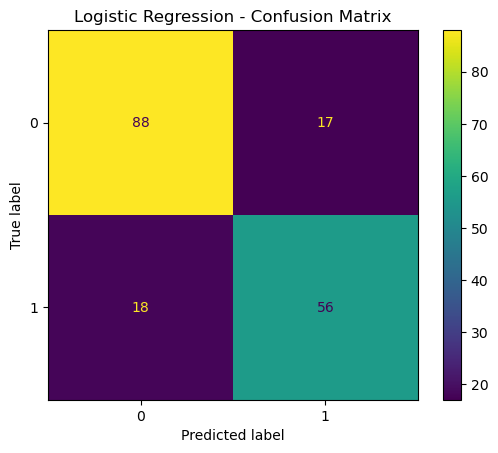

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.ax_.set_title("Logistic Regression - Confusion Matrix")
plt.show()

In [105]:
from scipy.stats import ttest_ind

# Divide the data into two groups: survived and not survived
survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(survived, not_survived)

print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age between survivors and non-survivors.")


T-Test Results:
T-Statistic: -1.9394214568382193
P-Value: 0.05276610621105064
Fail to reject the null hypothesis: There is no significant difference in age between survivors and non-survivors.


In [106]:
# Divide the data into two groups: survived and not survived
survived = df[df['Survived'] == 1]['Sex_1'].dropna()
not_survived = df[df['Survived'] == 0]['Sex_1'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(survived, not_survived)

print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Sex_1 between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Sex_1 between survivors and non-survivors.")


T-Test Results:
T-Statistic: -19.297816550123347
P-Value: 1.4060661308802993e-69
Reject the null hypothesis: There is a significant difference in Sex_1 between survivors and non-survivors.


In [107]:
from scipy.stats import chi2_contingency

# Create a contingency table for Survival and Gender
contingency_table = pd.crosstab(df['Survived'], df['Sex_1'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between gender and survival.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between gender and survival.")


Chi-Square Test Results:
Chi-Square Statistic: 260.71702016732104
P-Value: 1.1973570627755645e-58
Reject the null hypothesis: There is a significant relationship between gender and survival.


### Conclusion
In this analysis, we used the Titanic dataset to predict passenger survival. By performing exploratory data analysis, cleaning the data, and building a logistic regression model, we identified key factors that influenced survival. The model achieved an accuracy of 80%, indicating a reasonable ability to predict survival outcomes based on passenger features like age, gender, and class.
